In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

In [61]:
df = pd.read_csv("airquality.csv", encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [62]:
Dali = df['SiteName'].isin(['大里'])  # 找大里測站
df[Dali]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
14068,15059,大里,臺中市,120.0,細懸浮微粒,對敏感族群不良,1.8,0.56,0.8,2.2,...,62.0,24.0,20.0,30.0,10.0,0.5,252.0,2017/1/8 03:00,111.0,43.0
14144,15135,大里,臺中市,107.0,細懸浮微粒,對敏感族群不良,1.4,0.51,0.8,2.2,...,51.0,15.0,19.0,27.0,8.8,0.8,275.0,2017/1/8 04:00,98.0,38.0
14220,15211,大里,臺中市,95.0,細懸浮微粒,普通,1.5,0.48,0.7,2.6,...,39.0,19.0,18.0,28.0,9.5,0.6,244.0,2017/1/8 05:00,86.0,33.0
14296,15287,大里,臺中市,85.0,細懸浮微粒,普通,1.4,0.44,0.7,2.9,...,29.0,17.0,16.0,21.0,5.7,0.5,276.0,2017/1/8 06:00,75.0,29.0
14372,15363,大里,臺中市,76.0,細懸浮微粒,普通,6.1,0.52,0.6,2.9,...,23.0,9.0,15.0,26.0,11.0,1.3,199.0,2017/1/8 07:00,66.0,26.0
14448,15439,大里,臺中市,74.0,細懸浮微粒,普通,3.1,0.59,0.6,5.7,...,22.0,NaN,16.0,28.0,13.0,0.7,260.0,2017/1/8 08:00,57.0,25.0
14524,15515,大里,臺中市,68.0,細懸浮微粒,普通,2.1,0.72,0.6,11,...,43.0,NaN,20.0,32.0,13.0,1.2,237.0,2017/1/8 09:00,53.0,23.0
14600,15591,大里,臺中市,49.0,NaN,良好,2.5,0.71,0.6,22,...,58.0,NaN,25.0,35.0,10.0,1.9,273.0,2017/1/8 10:00,53.0,NaN
14676,15667,大里,臺中市,52.0,懸浮微粒,普通,2.5,0.41,0.5,28,...,75.0,42.0,17.0,22.0,5.5,1.9,27.0,2017/1/8 11:00,56.0,NaN
14752,15743,大里,臺中市,96.0,細懸浮微粒,普通,2.0,0.38,0.5,33,...,55.0,38.0,15.0,20.0,4.7,2.2,291.0,2017/1/8 12:00,57.0,34.0


In [63]:
Dali = df['SiteName'].isin(['大里'])  # 找大里測站
Dali = df[Dali].fillna(method='ffill').drop(columns=[
    'SiteName', 'AQI', 'id', 'Country', 'Pollutant', 'Status', 'CO_8hr',
    'O3_8hr', 'PublishTime', 'PM10_AVG', 'PM25_AVG','WindSpeed','WindDirec','NOx'
]).reset_index(drop=True)
# 只留下SiteName PM25 column

Dali

,SO2,CO,O3,PM10,PM25,NO2,NO
0,1.8,0.56,2.2,62.0,24.0,20.0,10.0
1,1.4,0.51,2.2,51.0,15.0,19.0,8.8
2,1.5,0.48,2.6,39.0,19.0,18.0,9.5
3,1.4,0.44,2.9,29.0,17.0,16.0,5.7
4,6.1,0.52,2.9,23.0,9.0,15.0,11.0
5,3.1,0.59,5.7,22.0,9.0,16.0,13.0
6,2.1,0.72,11,43.0,9.0,20.0,13.0
7,2.5,0.71,22,58.0,9.0,25.0,10.0
8,2.5,0.41,28,75.0,42.0,17.0,5.5
9,2.0,0.38,33,55.0,38.0,15.0,4.7


In [64]:
cd4 = Dali['PM25'] > 100
Dali[cd4]  # 輸出整筆資料

,SO2,CO,O3,PM10,PM25,NO2,NO


In [65]:
Dali.replace({0: np.nan, 0.0: np.nan}, inplace=True)  # 將0全部改為空值
Dali['SO2'].replace({37: np.nan, 37.0: np.nan}, inplace=True)
Dali

,SO2,CO,O3,PM10,PM25,NO2,NO
0,1.8,0.56,2.2,62.0,24.0,20.0,10.0
1,1.4,0.51,2.2,51.0,15.0,19.0,8.8
2,1.5,0.48,2.6,39.0,19.0,18.0,9.5
3,1.4,0.44,2.9,29.0,17.0,16.0,5.7
4,6.1,0.52,2.9,23.0,9.0,15.0,11.0
5,3.1,0.59,5.7,22.0,9.0,16.0,13.0
6,2.1,0.72,11.0,43.0,9.0,20.0,13.0
7,2.5,0.71,22.0,58.0,9.0,25.0,10.0
8,2.5,0.41,28.0,75.0,42.0,17.0,5.5
9,2.0,0.38,33.0,55.0,38.0,15.0,4.7


In [66]:
Dali.fillna(method='ffill', inplace=True)  # 以前面數字來取代0值

Dali

,SO2,CO,O3,PM10,PM25,NO2,NO
0,1.8,0.56,2.2,62.0,24.0,20.0,10.0
1,1.4,0.51,2.2,51.0,15.0,19.0,8.8
2,1.5,0.48,2.6,39.0,19.0,18.0,9.5
3,1.4,0.44,2.9,29.0,17.0,16.0,5.7
4,6.1,0.52,2.9,23.0,9.0,15.0,11.0
5,3.1,0.59,5.7,22.0,9.0,16.0,13.0
6,2.1,0.72,11.0,43.0,9.0,20.0,13.0
7,2.5,0.71,22.0,58.0,9.0,25.0,10.0
8,2.5,0.41,28.0,75.0,42.0,17.0,5.5
9,2.0,0.38,33.0,55.0,38.0,15.0,4.7


In [67]:
cd4 = Dali['PM25'].isin([0])
Dali[cd4]  # 輸出整筆資料

,SO2,CO,O3,PM10,PM25,NO2,NO


In [68]:
Dali['pr'] = ''
Dali.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,12371, 12372],inplace=True)
Dali.reset_index(drop=True, inplace=True)

Dali.to_csv('Dalipollution.csv')

Dali

,SO2,CO,O3,PM10,PM25,NO2,NO,pr
0,2.1,0.92,2.3,38.0,28.0,26.0,17.0,
1,2.7,0.92,2.3,33.0,22.0,25.0,22.0,
2,2.5,0.48,11.0,36.0,18.0,14.0,1.5,
3,2.0,0.43,10.0,25.0,17.0,12.0,1.8,
4,1.5,0.57,7.4,13.0,17.0,13.0,4.8,
5,1.8,0.66,3.0,5.0,17.0,16.0,8.1,
6,2.6,0.76,2.8,15.0,12.0,17.0,12.0,
7,3.2,1.09,4.0,25.0,13.0,21.0,28.0,
8,3.0,0.86,14.0,36.0,15.0,22.0,16.0,
9,2.6,0.78,22.0,39.0,19.0,22.0,9.6,


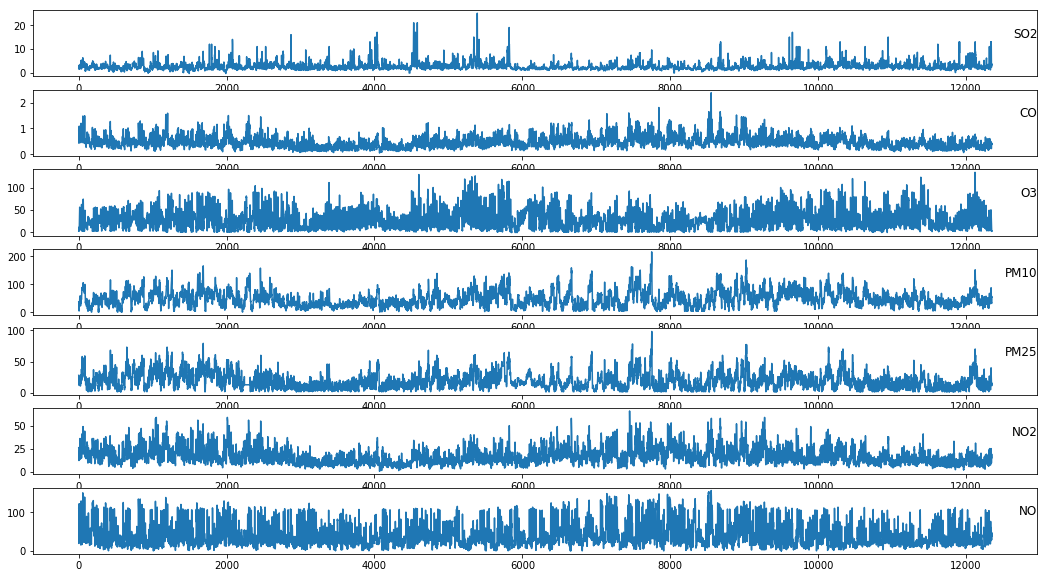

In [69]:
# load dataset
dataset = pd.read_csv('Dalipollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:, 6] = encoder.fit_transform(values[:, 6])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
plt.figure(figsize=(18, 10))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [70]:
dataset

,SO2,CO,O3,PM10,PM25,NO2,NO,pr
0,2.1,0.92,2.3,38.0,28.0,26.0,111.0,NaN
1,2.7,0.92,2.3,33.0,22.0,25.0,116.0,NaN
2,2.5,0.48,11.0,36.0,18.0,14.0,19.0,NaN
3,2.0,0.43,10.0,25.0,17.0,12.0,22.0,NaN
4,1.5,0.57,7.4,13.0,17.0,13.0,52.0,NaN
5,1.8,0.66,3.0,5.0,17.0,16.0,85.0,NaN
6,2.6,0.76,2.8,15.0,12.0,17.0,106.0,NaN
7,3.2,1.09,4.0,25.0,13.0,21.0,122.0,NaN
8,3.0,0.86,14.0,36.0,15.0,22.0,110.0,NaN
9,2.6,0.78,22.0,39.0,19.0,22.0,100.0,NaN


In [71]:
# z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()  # z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr'] = dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,CO,O3,PM10,PM25,NO2,NO,pr
0,-0.338785,2.107269,-1.132950,-0.393951,0.683442,1.046105,2.596109,28.0
1,0.061253,2.107269,-1.132950,-0.575651,0.208847,0.934224,2.770422,22.0
2,-0.072093,0.101671,-0.733466,-0.466631,-0.107549,-0.296461,-0.611250,18.0
3,-0.405458,-0.126238,-0.779383,-0.866373,-0.186648,-0.520221,-0.506662,17.0
4,-0.738822,0.511907,-0.898770,-1.302454,-0.186648,-0.408341,0.539216,17.0
5,-0.538804,0.922143,-1.100808,-1.593175,-0.186648,-0.072700,1.689682,17.0
6,-0.005420,1.377961,-1.109991,-1.229774,-0.582144,0.039181,2.421796,12.0
7,0.394617,2.882159,-1.054890,-0.866373,-0.503045,0.486703,2.979598,13.0
8,0.261271,1.833779,-0.595713,-0.466631,-0.344847,0.598583,2.561247,15.0
9,-0.005420,1.469124,-0.228371,-0.357611,-0.028450,0.598583,2.212621,19.0


In [72]:
def train_window(df, ref_hr=66, pr_hr=6):
    X_train, Y_train = [], []
    for i in range(df.shape[0] - pr_hr - ref_hr):
        X_train.append(np.array(df.iloc[i:i + ref_hr, :-1]))
        Y_train.append(np.array(df.iloc[i + ref_hr:i + ref_hr + pr_hr]["pr"]))


#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
# 选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]]
# "，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。
# 需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train)

In [73]:
# 將次序打亂 資料亂序 將資料打散，而非照日期排序
# def shuffle(X, Y):
#    np.random.seed(10)
#   randomList = np.arange(X.shape[0])
#   np.random.shuffle(randomList)
#  return X[randomList], Y[randomList]

In [74]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data
def splitData(X, Y, rate):
    X_train = X[int(X.shape[0] * rate):]
    Y_train = Y[int(Y.shape[0] * rate):]
    X_val = X[:int(X.shape[0] * rate)]
    Y_val = Y[:int(Y.shape[0] * rate)]
    return X_train, Y_train, X_val, Y_val

In [75]:
# 合併輸出
from sklearn.utils import shuffle 
# build Data, use last 23 hours to predict next 1 hours
X_train, Y_train = train_window(train_set_scaled, 24, 7)

# shuffle the data, and random seed is 10
#X_train, Y_train = shuffle(X_train, Y_train)
X_train ,Y_train = shuffle(X_train , Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

# from 2 dimmension to 3 dimension
#Y_train = Y_train[:,:,np.newaxis]
#Y_val = Y_val[:,:,np.newaxis]

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, input_shape=(24, 7))`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128)               69632     
_________________________________________________________________
activation_17 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               33024     
_________________________________________________________________
activation_18 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_19 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
__________

9979/9979 [==============================] - 2s 155us/step - loss: 57.1732 - val_loss: 58.6357
Epoch 63/500
9979/9979 [==============================] - 2s 154us/step - loss: 56.6877 - val_loss: 58.5652
Epoch 64/500
9979/9979 [==============================] - 2s 158us/step - loss: 56.4735 - val_loss: 58.2304
Epoch 65/500
9979/9979 [==============================] - 2s 159us/step - loss: 56.6663 - val_loss: 59.4854
Epoch 66/500
9979/9979 [==============================] - 2s 162us/step - loss: 56.0202 - val_loss: 57.8501
Epoch 67/500
9979/9979 [==============================] - 2s 158us/step - loss: 55.8335 - val_loss: 57.1954
Epoch 68/500
9979/9979 [==============================] - 2s 161us/step - loss: 55.4929 - val_loss: 57.4140
Epoch 69/500
9979/9979 [==============================] - 2s 164us/step - loss: 54.7491 - val_loss: 58.4559
Epoch 70/500
9979/9979 [==============================] - 2s 160us/step - loss: 55.0905 - val_loss: 57.2443
Epoch 71/500
9979/9979 [=================

9979/9979 [==============================] - 2s 159us/step - loss: 34.8412 - val_loss: 44.1548
Epoch 138/500
9979/9979 [==============================] - 2s 161us/step - loss: 34.4790 - val_loss: 43.4784
Epoch 139/500
9979/9979 [==============================] - 2s 158us/step - loss: 33.8072 - val_loss: 43.5434
Epoch 140/500
9979/9979 [==============================] - 2s 156us/step - loss: 33.6443 - val_loss: 43.1592
Epoch 141/500
9979/9979 [==============================] - 2s 160us/step - loss: 33.2985 - val_loss: 43.1117
Epoch 142/500
9979/9979 [==============================] - 2s 165us/step - loss: 33.4146 - val_loss: 43.5585
Epoch 143/500
9979/9979 [==============================] - 2s 156us/step - loss: 33.4107 - val_loss: 41.7940
Epoch 144/500
9979/9979 [==============================] - 2s 160us/step - loss: 33.4233 - val_loss: 41.8688
Epoch 145/500
9979/9979 [==============================] - 2s 166us/step - loss: 32.5606 - val_loss: 42.3130
Epoch 146/500
9979/9979 [========

9979/9979 [==============================] - 2s 172us/step - loss: 23.6882 - val_loss: 34.5877
Epoch 213/500
9979/9979 [==============================] - 2s 157us/step - loss: 23.9460 - val_loss: 34.4121
Epoch 214/500
9979/9979 [==============================] - 2s 160us/step - loss: 23.9051 - val_loss: 36.0005
Epoch 215/500
9979/9979 [==============================] - 2s 162us/step - loss: 23.5452 - val_loss: 35.7655
Epoch 216/500
9979/9979 [==============================] - 2s 158us/step - loss: 23.3066 - val_loss: 34.9020
Epoch 217/500
9979/9979 [==============================] - 2s 167us/step - loss: 23.1708 - val_loss: 34.6903
Epoch 218/500
9979/9979 [==============================] - 2s 165us/step - loss: 23.2158 - val_loss: 34.4142
Epoch 219/500
9979/9979 [==============================] - 2s 162us/step - loss: 22.8941 - val_loss: 34.0689
Epoch 220/500
9979/9979 [==============================] - 2s 162us/step - loss: 22.9093 - val_loss: 35.4472
Epoch 221/500
9979/9979 [========

9979/9979 [==============================] - 2s 164us/step - loss: 18.4523 - val_loss: 31.2016
Epoch 288/500
9979/9979 [==============================] - 2s 169us/step - loss: 18.3454 - val_loss: 30.2448
Epoch 289/500
9979/9979 [==============================] - 2s 167us/step - loss: 18.4015 - val_loss: 31.7742
Epoch 290/500
9979/9979 [==============================] - 2s 165us/step - loss: 18.5006 - val_loss: 31.9145
Epoch 291/500
9979/9979 [==============================] - 2s 164us/step - loss: 18.5203 - val_loss: 31.8543
Epoch 292/500
9979/9979 [==============================] - 2s 163us/step - loss: 18.3627 - val_loss: 31.1251
Epoch 293/500
9979/9979 [==============================] - 2s 165us/step - loss: 18.3686 - val_loss: 31.6202
Epoch 294/500
9979/9979 [==============================] - 2s 163us/step - loss: 18.4168 - val_loss: 30.8527
Epoch 295/500
9979/9979 [==============================] - 2s 162us/step - loss: 18.1603 - val_loss: 31.3167
Epoch 296/500
9979/9979 [========

9979/9979 [==============================] - 2s 155us/step - loss: 16.0710 - val_loss: 29.2004
Epoch 363/500
9979/9979 [==============================] - 2s 160us/step - loss: 16.0296 - val_loss: 29.0858
Epoch 364/500
9979/9979 [==============================] - 2s 155us/step - loss: 15.9005 - val_loss: 29.0640
Epoch 365/500
9979/9979 [==============================] - 2s 157us/step - loss: 16.0191 - val_loss: 30.1181
Epoch 366/500
9979/9979 [==============================] - 2s 167us/step - loss: 16.0344 - val_loss: 29.4370
Epoch 367/500
9979/9979 [==============================] - 2s 156us/step - loss: 15.8901 - val_loss: 29.2533
Epoch 368/500
9979/9979 [==============================] - 2s 165us/step - loss: 15.7586 - val_loss: 29.3137
Epoch 369/500
9979/9979 [==============================] - 2s 158us/step - loss: 15.6263 - val_loss: 29.2207
Epoch 370/500
9979/9979 [==============================] - 2s 158us/step - loss: 15.8549 - val_loss: 29.1813
Epoch 371/500
9979/9979 [========

9979/9979 [==============================] - 2s 159us/step - loss: 14.0672 - val_loss: 28.1133
Epoch 438/500
9979/9979 [==============================] - 2s 154us/step - loss: 13.9045 - val_loss: 28.4542
Epoch 439/500
9979/9979 [==============================] - 2s 155us/step - loss: 14.0208 - val_loss: 28.5988
Epoch 440/500
9979/9979 [==============================] - 2s 160us/step - loss: 13.8194 - val_loss: 28.1167
Epoch 441/500
9979/9979 [==============================] - 2s 203us/step - loss: 13.8119 - val_loss: 28.1224
Epoch 442/500
9979/9979 [==============================] - 2s 196us/step - loss: 13.9157 - val_loss: 28.1512
Epoch 443/500
9979/9979 [==============================] - 2s 172us/step - loss: 13.7792 - val_loss: 27.9582
Epoch 444/500
9979/9979 [==============================] - 2s 160us/step - loss: 13.8546 - val_loss: 27.7617
Epoch 445/500
9979/9979 [==============================] - 2s 163us/step - loss: 13.8079 - val_loss: 28.3944
Epoch 446/500
9979/9979 [========

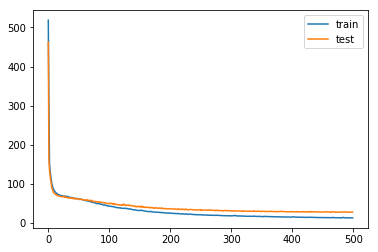

In [76]:
#model2

def buildManyToOneModel2(shape):
    model = Sequential()
    model.add(LSTM(128,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model2 = buildManyToOneModel2(X_train.shape)

history=model2.fit(X_train, Y_train, epochs=500, batch_size=800, validation_split= 0.1)

#plot.history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model2
model2.save('Dalimodel2.h5')
del model2

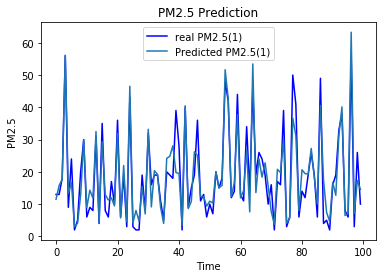

Train 0.479978354978355
Validation 0.3371242891957758
The R2 score on the Test set is:	0.828
Train Score: 3.46 RMSE
Test Score: 5.32 RMSE
The RMSE  on the Test set is: 5.316102081033509
The MAE   on the Test set is: 3.8208940026515785
The MAPE  on the Test set is: 0.025169729104036948
The SMAPE on the Test set is: 0.02013726932222639


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


In [77]:
#讀取model2
model = load_model('Dalimodel2.h5')
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

#print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100


# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用

In [78]:
print(testPredict.shape)
print(trainPredict.shape)
print(Y_val.shape)

(1231, 7)
(11088, 7)
(1231, 7)
